[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1_-5RD5YVFb7XbeBrlE5lbH9v0vIH0J-S?usp=sharing)

In [ ]:
!pip install yellowbrick==1.3  # Install a specific compatible version of yellowbrick
!pip install scipy==1.7.1      # Install a specific version of scipy
!pip install pycaret           # Install the latest version of pycaret


  Using cached yellowbrick-1.3-py3-none-any.whl (271 kB)
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
  Using cached contourpy-1.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (301 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.1

## *Data loading and inspection

In [ ]:
# First, we need to load the dataset to understand its structure and contents
import pandas as pd

# Load the dataset
file_path = '/content/d_CreditCardCustomerData.csv'
credit_card_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an overview
credit_card_data.head()


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# Checking for missing values and data types
missing_values = credit_card_data.isnull().sum()
data_types = credit_card_data.dtypes

# Performing basic statistical analysis
basic_statistics = credit_card_data.describe()

missing_values, data_types, basic_statistics


(Sl_No                  0
 Customer_Key           0
 Avg_Credit_Limit       0
 Total_Credit_Cards     0
 Total_visits_bank      0
 Total_visits_online    0
 Total_calls_made       0
 dtype: int64,
 Sl_No                  int64
 Customer_Key           int64
 Avg_Credit_Limit       int64
 Total_Credit_Cards     int64
 Total_visits_bank      int64
 Total_visits_online    int64
 Total_calls_made       int64
 dtype: object,
             Sl_No  Customer_Key  Avg_Credit_Limit  Total_Credit_Cards  \
 count  660.000000    660.000000        660.000000          660.000000   
 mean   330.500000  55141.443939      34574.242424            4.706061   
 std    190.669872  25627.772200      37625.487804            2.167835   
 min      1.000000  11265.000000       3000.000000            1.000000   
 25%    165.750000  33825.250000      10000.000000            3.000000   
 50%    330.500000  53874.500000      18000.000000            5.000000   
 75%    495.250000  77202.500000      48000.000000         

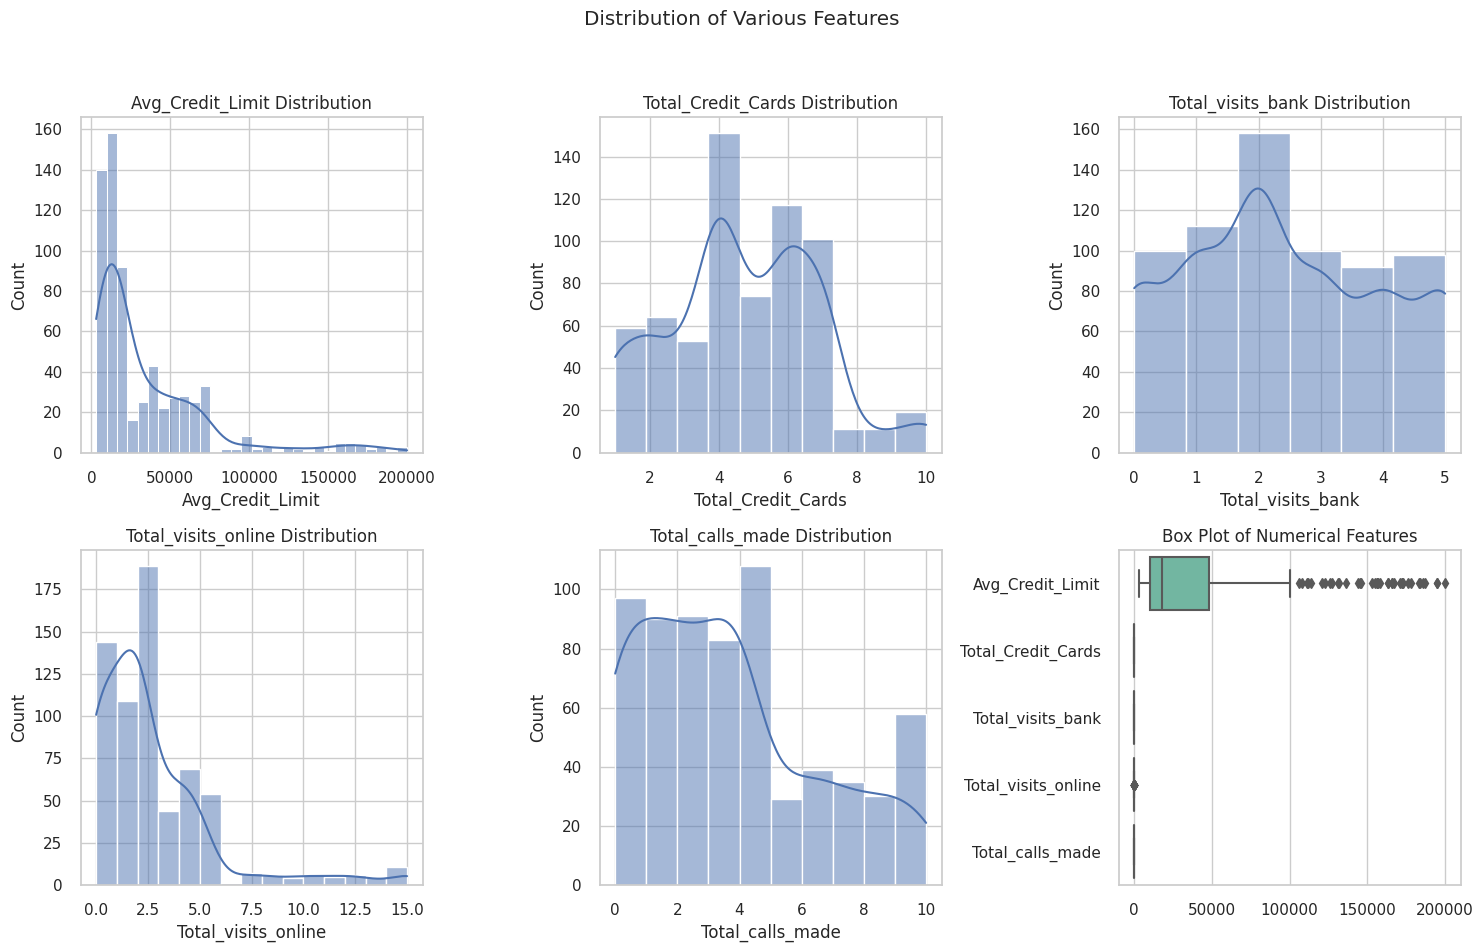

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Creating a figure with multiple subplots for different variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Various Features')

# Histograms for numerical features
sns.histplot(credit_card_data['Avg_Credit_Limit'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Avg_Credit_Limit Distribution')

sns.histplot(credit_card_data['Total_Credit_Cards'], bins=10, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Total_Credit_Cards Distribution')

sns.histplot(credit_card_data['Total_visits_bank'], bins=6, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Total_visits_bank Distribution')

sns.histplot(credit_card_data['Total_visits_online'], bins=15, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Total_visits_online Distribution')

sns.histplot(credit_card_data['Total_calls_made'], bins=10, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Total_calls_made Distribution')

# Dropping 'Sl_No' and 'Customer_Key' as they are identifiers and not useful for plotting
credit_card_data_for_boxplot = credit_card_data.drop(['Sl_No', 'Customer_Key'], axis=1)

# Boxplot for seeing the distribution and outliers
sns.boxplot(data=credit_card_data_for_boxplot, orient="h", palette="Set2", ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Numerical Features')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Dropping 'Sl_No' and 'Customer_Key' as they are just identifiers and not useful for clustering
processed_data = credit_card_data.drop(['Sl_No', 'Customer_Key'], axis=1)

# Standardizing the data - very important for clustering algorithms
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Converting scaled data back to a DataFrame for ease of use
scaled_data_df = pd.DataFrame(scaled_data, columns=processed_data.columns)

# Displaying first few rows of the scaled data
scaled_data_df.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [ ]:
# Importing necessary modules from PyCaret
from pycaret.clustering import setup, create_model, assign_model

# Setting up PyCaret environment with the scaled data
cluster_setup = setup(data=scaled_data_df,
                      ignore_features=['Cluster'],  # Ignoring the Cluster column we added earlier
                      session_id=123)

# Creating the DBSCAN model in PyCaret
dbscan_model = create_model('dbscan')  # No num_clusters parameter for DBSCAN

# Assigning clusters to the data
dbscan_results = assign_model(dbscan_model)

# dbscan_results will include the cluster assignments for each data point


,Description,Value
0,Session id,123
1,Original data shape,"(660, 5)"
2,Transformed data shape,"(660, 5)"
3,Ignore features,1
4,Numeric features,5
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1403,24.8639,1.8592,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Importing the necessary module for visualization
from pycaret.clustering import plot_model

# Cluster Scatter Plot (2D)
plot_model(dbscan_model, plot='cluster')


In [ ]:

# t-SNE (t-Distributed Stochastic Neighbor Embedding) Plot
plot_model(dbscan_model, plot='tsne')

In [ ]:
# Distribution Plot
plot_model(dbscan_model, plot='distribution')  # this will show the distribution of clusters